In [1]:
# Imports and Setup
import subprocess
import json
import pandas as pd
import random
import re
import ast
import matplotlib.pyplot as plt

# Define your models and input prompts
models = [
    "mistral:7b", "deepseek-r1:8b", "llama3.1:8b", "gemma:7b"
]

prompts = [
    {
        "ticker": "MSFT",
        "action": "BUY",
        "pe": 32.1,
        "rsi": 58,
        "beta": 1.1
    },
    {
        "ticker": "NVDA",
        "action": "HOLD",
        "pe": 75.6,
        "rsi": 69,
        "beta": 1.8
    },
    {
        "ticker": "AMZN",
        "action": "SELL",
        "pe": 92.4,
        "rsi": 73,
        "beta": 1.4
    }
]


In [2]:
# Prompt Template Function
def build_prompt(data):
    return f"""You are a financial assistant. Based on the following metrics:

Ticker: {data['ticker']}
Action: {data['action']}
P/E Ratio: {data['pe']}
RSI: {data['rsi']}
Beta: {data['beta']}

Generate a short, clear explanation of why this action was recommended, using only the signals provided.

Your explanation will be evaluated based on:
1. Factual alignment – Does it correctly reference and reflect the input signals?
2. Clarity – Is it readable and jargon-free for a non-expert?
3. Educational value – Does it help the user understand financial reasoning?

Write in a tone that is simple, supportive, and instructive.
"""


In [3]:
# Run Inference (Ollama CLI)
def query_ollama(model: str, prompt: str) -> str:
    try:
        result = subprocess.run(
            ["ollama", "run", model],
            input=prompt,
            text=True,
            capture_output=True,
            timeout=60
        )
        return result.stdout.strip()
    except Exception as e:
        return f"Error: {str(e)}"


In [4]:
results = []

for model in models:
    for data in prompts:
        prompt = build_prompt(data)
        print(f"Running model: {model} on {data['ticker']}")
        response = query_ollama(model, prompt)
        results.append({
            "model": model,
            "ticker": data["ticker"],
            "action": data["action"],
            "pe":data["pe"],
            "rsi":data["rsi"],
            "beta":data["beta"],
            "response": response
        })

Running model: mistral:7b on MSFT
Running model: mistral:7b on NVDA
Running model: mistral:7b on AMZN
Running model: deepseek-r1:8b on MSFT
Running model: deepseek-r1:8b on NVDA
Running model: deepseek-r1:8b on AMZN
Running model: llama3.1:8b on MSFT
Running model: llama3.1:8b on NVDA
Running model: llama3.1:8b on AMZN
Running model: gemma:7b on MSFT
Running model: gemma:7b on NVDA
Running model: gemma:7b on AMZN


In [5]:
df = pd.DataFrame(results)
df.head()

,model,ticker,action,pe,rsi,beta,response
0,mistral:7b,MSFT,BUY,32.1,58,1.1,Based on the provided metrics for Microsoft (t...
1,mistral:7b,NVDA,HOLD,75.6,69,1.8,Based on the provided metrics for NVDA (NVIDIA...
2,mistral:7b,AMZN,SELL,92.4,73,1.4,"Based on the provided metrics, I recommend sel..."
3,deepseek-r1:8b,MSFT,BUY,32.1,58,1.1,"Thinking...\nHmm, the user wants me to create ..."
4,deepseek-r1:8b,NVDA,HOLD,75.6,69,1.8,"Thinking...\nHmm, the user is asking me to act..."


In [6]:
print("Ticker: ", df.ticker[0])
print("Action: ", df.action[0])
print("P/E: ", df.pe[0])
print("RSI: ", df.rsi[0])
print("beta: ", df.beta[0])

Ticker:  MSFT
Action:  BUY
P/E:  32.1
RSI:  58
beta:  1.1


In [7]:
print("Model: ", df.model[0])
print("Response: ", df.response[0])

Model:  mistral:7b
Response:  Based on the provided metrics for Microsoft (ticker: MSFT), I would recommend purchasing this stock due to several positive indicators.

Firstly, the P/E Ratio of 32.1 indicates that investors are willing to pay a higher price for each dollar of earnings from Microsoft, suggesting the company's growth potential and profitability. However, it is essential to be aware that high P/E Ratios can make a stock more risky.

Secondly, the Relative Strength Index (RSI) of 58 shows that Microsoft's price has been increasing at a rate that is neither overbought nor oversold, which can indicate stability and potential for further growth. An RSI value below 30 suggests the stock is oversold or undervalued, while a value above 70 indicates it is overbought.

Lastly, Microsoft has a Beta of 1.1, indicating that its price movements are relatively responsive to market swings but slightly more volatile than the overall market. While this can potentially lead to higher return

In [8]:
print("Model: ", df.model[3])
print("Response: ", df.response[3])

Model:  deepseek-r1:8b
Response:  Thinking...
Hmm, the user wants me to create an explanation for why Microsoft (MSFT) was recommended as a "BUY" based on three specific metrics: P/E ratio of 32.1, RSI of 58, and Beta of 1.1.

I need to analyze these signals carefully:
- The P/E is higher than the average tech stock, suggesting it might be overvalued or investors expect future growth.
- RSI at 58 indicates neutral momentum; not oversold but also not strongly bullish.
- Beta shows MSFT is slightly more volatile than the market.

I'll explain each metric simply and tie them together logically. For P/E, I need to show how it compares without assuming perfect knowledge of what's average or ideal. RSI should be explained as a neutral signal in trading terms. Beta needs context about volatility relative to the market.

The user is probably not very familiar with finance, so my explanation must avoid technical jargon and use everyday language like "not too cheap" instead of precise valuation 

In [9]:
print("Model: ", df.model[6])
print("Response: ", df.response[6])

Model:  llama3.1:8b
Response:  Here's why we're recommending a BUY action on MSFT:

We've analyzed Microsoft's (MSFT) stock performance and found some encouraging signs.

The Price-to-Earnings (P/E) Ratio is 32.1, which is relatively high compared to the industry average. This might indicate that investors are expecting strong growth from the company, which could be a positive sign.

Meanwhile, the Relative Strength Index (RSI) is at 58, indicating that the stock's price has not yet reached overbought territory. This means there's still room for the stock to rise without facing significant selling pressure.

Lastly, Microsoft's Beta value of 1.1 suggests that its stock price tends to move slightly more than the overall market. Given this volatility, we think it's a good time to buy in.

Overall, these signals suggest that MSFT has potential for growth and is not overly expensive compared to other stocks. That's why we're recommending a BUY action.


In [10]:
print("Model: ", df.model[9])
print("Response: ", df.response[9])

Model:  gemma:7b
Response:  The recommended action to **BUY MSFT** is supported by two key signals:

**1. High RSI (58):** This indicates that the stock is experiencing strong buying momentum, suggesting potential for further price increases.

**2. High P/E Ratio (32.1):** While this may seem expensive, the strong buying momentum could justify the premium if the company continues to deliver exceptional earnings growth.

These signals suggest that MSFT is in a favorable market position with strong potential for future appreciation.


In [11]:


models = df["model"].unique().tolist()
tickers = df["ticker"].unique().tolist()
grouped = {ticker: df[df["ticker"] == ticker].to_dict("records") for ticker in tickers}

def build_prompt(ticker, action, pe, rsi, beta, anonymised):
    prompt = f"You are evaluating explanations for:\n" \
             f"Ticker: {ticker}, Action: {action}, P/E: {pe}, RSI: {rsi}, Beta: {beta}\n\n" \
             f"Explanations:\n"
    for r in anonymised:
        prompt += f"{r['id']}: {r['response']}\n"
    prompt += (
        "\nEvaluate each explanation on 1–5 (with 5 being excellent!) for:\n"
        "1. Factual alignment with input signals\n"
        "2. Clarity for non-experts\n"
        "3. Educational value\n\n"
        "Return only a JSON object like:\n"
        "{ \"Resp 1\": [5, 4, 5], \"Resp 2\": [4, 3, 5], ... }"
    )
    return prompt

def safe_parse_json(text):
    try:
        match = re.search(r"\{.*?\}", text, re.DOTALL)
        if not match:
            return None
        return ast.literal_eval(match.group())
    except Exception:
        return None

all_scores = []

for ticker in tickers:
    rows = grouped[ticker]
    for judge in models:
        for run in range(3):  # Repeat evaluation 3 times
            shuffled = random.sample(rows, len(rows))
            anonymised = [{"id": f"Resp {i+1}", "response": r["response"]} for i, r in enumerate(shuffled)]
            id_to_model = {f"Resp {i+1}": r["model"] for i, r in enumerate(shuffled)}

            prompt = build_prompt(
                ticker=ticker,
                action=rows[0]["action"],
                pe=rows[0]["pe"],
                rsi=rows[0]["rsi"],
                beta=rows[0]["beta"],
                anonymised=anonymised
            )

            result = subprocess.run(
                ["ollama", "run", judge],
                input=prompt,
                text=True,
                capture_output=True,
                timeout=90
            )

            output = result.stdout.strip()
            parsed = safe_parse_json(output)

            if parsed:
                for rid, scores in parsed.items():
                    all_scores.append({
                        "evaluator": judge,
                        "model": id_to_model.get(rid),
                        "ticker": ticker,
                        "response_id": rid,
                        "run": run + 1,
                        "score_factual": scores[0],
                        "score_clarity": scores[1],
                        "score_learning": scores[2]
                    })
            else:
                print(f"Failed to parse response from {judge} on {ticker} (run {run+1})")
                print(output)



📊 Weighted Model Rankings (Fluency Emphasised):
                score_factual  score_clarity  score_learning  mean_weighted
model                                                                      
deepseek-r1:8b           4.62           4.18            4.74           4.48
llama3.1:8b              4.47           4.06            4.72           4.38
mistral:7b               4.47           3.97            4.78           4.36
gemma:7b                 4.06           3.80            4.26           4.02


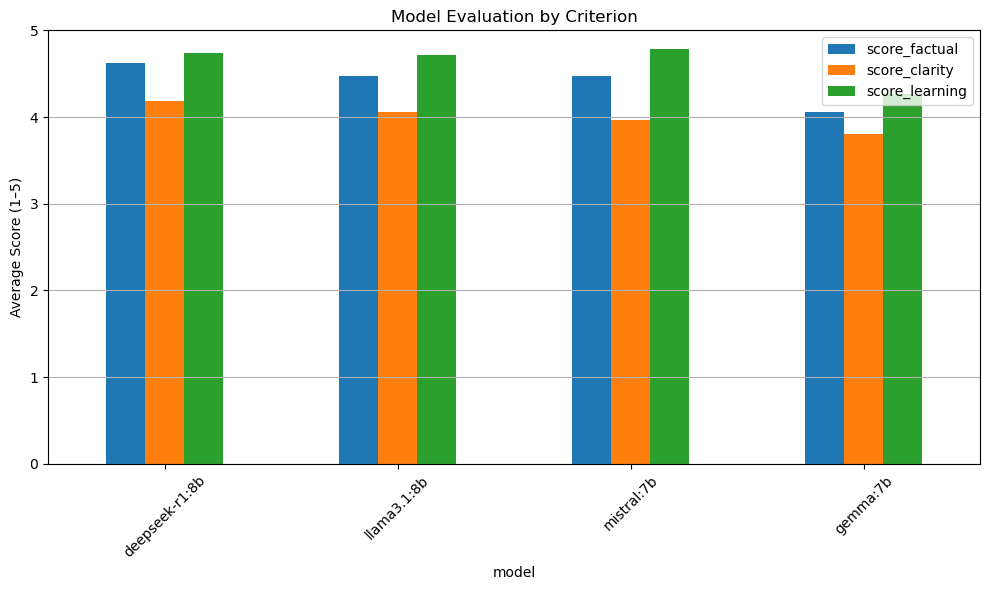

In [12]:
# === Score aggregation and weighted ranking ===
df_scores = pd.DataFrame(all_scores)

# Mean per model
agg = (
    df_scores.groupby("model")[["score_factual", "score_clarity", "score_learning"]]
    .mean()
    .round(2)
)

# Apply custom weights (fluency weighted higher)
w_factual = 0.3
w_clarity = 0.4
w_learning = 0.3

agg["mean_weighted"] = (
    agg["score_factual"] * w_factual +
    agg["score_clarity"] * w_clarity +
    agg["score_learning"] * w_learning
).round(2)

# Sort by weighted score
agg = agg.sort_values(by="mean_weighted", ascending=False)

# Display result
print("\n📊 Weighted Model Rankings (Fluency Emphasised):")
print(agg[["score_factual", "score_clarity", "score_learning", "mean_weighted"]])

# Optional: bar chart
agg[["score_factual", "score_clarity", "score_learning"]].plot(
    kind="bar", figsize=(10, 6), title="Model Evaluation by Criterion"
)
plt.ylabel("Average Score (1–5)")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()